If you are using Google Colab, download the data set to your Google Drive by going to the link https://drive.google.com/drive/folders/1aPL24P610NHLvt9exk6-B7SzGk3R8Q48?usp=sharing and selecting "Add to My Drive". This is faster than downloading the data from the course website.

Then, mount Google Drive from your Google Colab notebook:

In [ ]:
# Mount to google drive for Data
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Set up imports

import tensorflow as tf
import pandas as pd

from keras.models import Sequential
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models, torchvision.datasets
from torch.utils.data import TensorDataset, DataLoader, random_split
import torchvision.transforms as transforms
import torchvision.datasets as datasets
%matplotlib inline

import helper
import os
import pickle
import glob
import re

tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# Paths for Google Drive

import zipfile
zip_path = "/content/gdrive/My Drive/archive.zip"

!unzip -u "/content/gdrive/My Drive/archive.zip" -d "/content"

train_path = "/content/train/"
# valid_path = ""
test_path = "/content/test/"


Archive:  /content/gdrive/My Drive/archive.zip


# Pre-proccessing Data

Description of Pre-proccessing

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(train_path, validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(48, 48),
  batch_size=32)
valid_ds = tf.keras.utils.image_dataset_from_directory(train_path, validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(48, 48),
  batch_size=32)

class_names = train_ds.class_names
print(class_names)

Found 28709 files belonging to 7 classes.
Using 22968 files for training.
Found 28709 files belonging to 7 classes.
Using 5741 files for validation.
['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


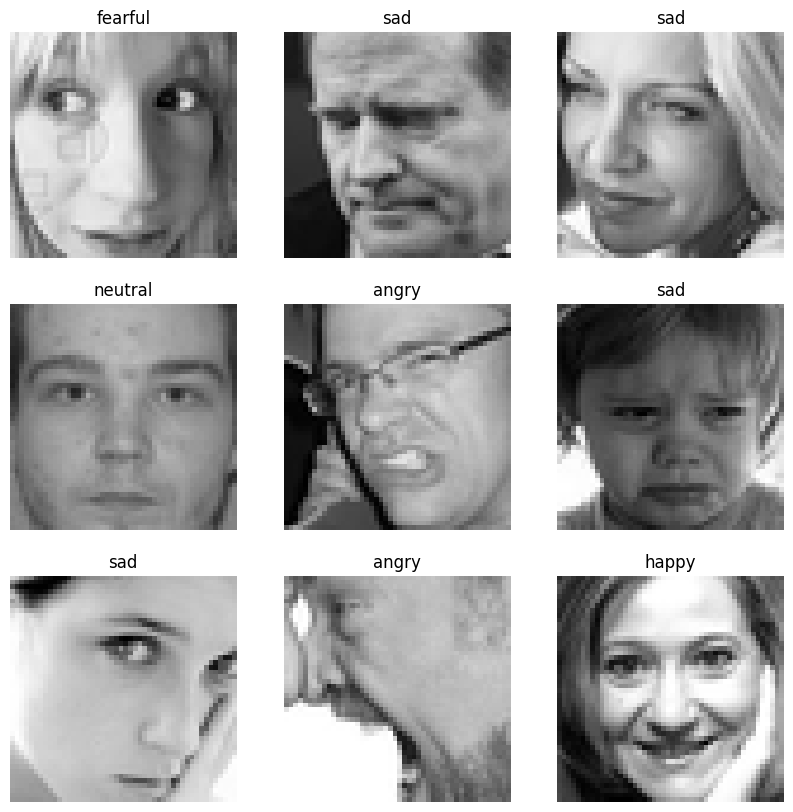

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)   #normalization layer to put in model. Make alter range of values to [0,1].

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = 7

model = tf.keras.Sequential([
  normalization_layer,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.25),

  tf.keras.layers.Conv2D(256, 5, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.25),

  tf.keras.layers.Conv2D(512, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.25),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])


model.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=30,
  callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                         patience=7,
                                                         verbose= 1 ,
                                                         restore_best_weights=True
                                                        )]
)


Epoch 1/30
718/718 [==============================] - 23s 29ms/step - loss: 1.7663 - accuracy: 0.3273 - val_loss: 1.9021 - val_accuracy: 0.2637
Epoch 2/30
718/718 [==============================] - 21s 29ms/step - loss: 1.4143 - accuracy: 0.4498 - val_loss: 1.4201 - val_accuracy: 0.4550
Epoch 3/30
718/718 [==============================] - 21s 29ms/step - loss: 1.2639 - accuracy: 0.5180 - val_loss: 1.2727 - val_accuracy: 0.5166
Epoch 4/30
718/718 [==============================] - 21s 29ms/step - loss: 1.1675 - accuracy: 0.5578 - val_loss: 1.2581 - val_accuracy: 0.5238
Epoch 5/30
718/718 [==============================] - 21s 29ms/step - loss: 1.0952 - accuracy: 0.5860 - val_loss: 1.2796 - val_accuracy: 0.5126
Epoch 6/30
718/718 [==============================] - 21s 29ms/step - loss: 1.0133 - accuracy: 0.6212 - val_loss: 1.2288 - val_accuracy: 0.5511
Epoch 7/30
718/718 [==============================] - 21s 29ms/step - loss: 0.9373 - accuracy: 0.6468 - val_loss: 1.4801 - val_accuracy: